# Chapter 17 exercise solutions

In [3]:
import numpy as np

3. Write a function my_nearest_neighbor(x, y, X) where x and y are arrays that contain experi-
mental data points, and X is an array. Assume that x and X are in ascending order and have unique 
elements. The output argument, Y, should be an array the same size as X, where Y[i] is the near-
est neighbor interpolation of X[i]. That is, Y[i] should be the y[j] where x[j] is the closest 
independent data point of X[i]. Do not use interp1d from SciPy.

In [5]:
def my_nearest_neighbor(x, y, X):
    Y = np.zeros_like(X, dtype=float) 

    for i, xi in enumerate(X):
        index = np.argmin(np.abs(x - xi))
        Y[i] = y[index]  

    return Y

In [4]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 10, 20, 30, 40, 50])
X = np.array([0.2, 1.8, 3.5, 4.9])

Y = my_nearest_neighbor(x, y, X)
print(Y)

[ 0. 20. 30. 50.]


7. Write a function my_interp_plotter(x, y, X, option) where x and y are arrays containing 
experimental data points, and Xis an array that contains the coordinates for which an interpolation 
is desired. The input argument option should be a string, either “linear,” “spline,” or “nearest.” 
Your function should produce a plot of the data points (x, y) marked as red circles. The points 
(X, Y ), where X is the input and Y is the interpolation at the points contained in X deﬁned by the 
input argument speciﬁed by option. The points (X, Y ) should be connected by a blue line. Be sure 
to include the title, axis labels, and a legend. Hint: You should use interp1d from SciPy, and 
checkout the kind option.

In [7]:
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

def my_interp_plotter(x, y, X, option):
    if option not in ['linear', 'spline', 'nearest']:
        raise ValueError("Option must be 'linear', 'spline', or 'nearest'")
    
    if option == 'spline':
        kind = 'cubic'
    else:
        kind = option

    interpolator = interp1d(x, y, kind=kind, fill_value="extrapolate")
    Y = interpolator(X)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'ro', label='Data points (x, y)')
    plt.plot(X, Y, 'b-', label=f'Interpolation ({option})')
    plt.title('Interpolation Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


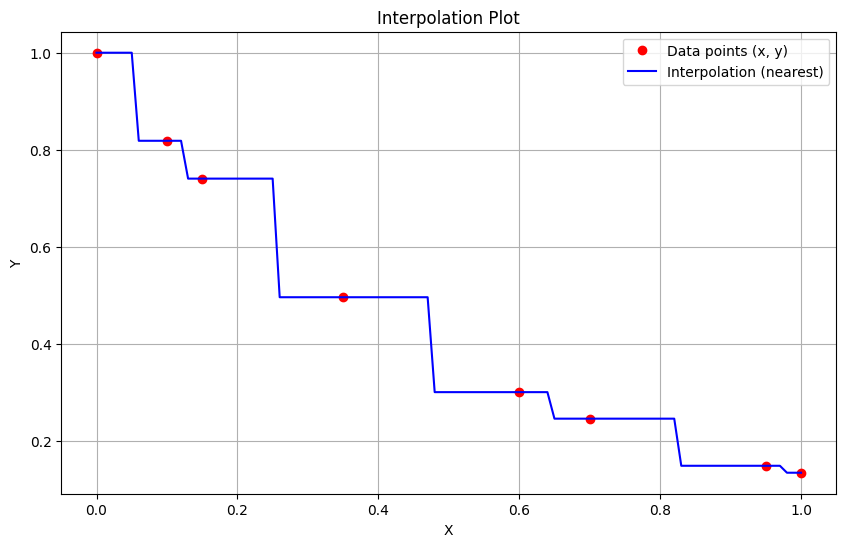

In [8]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1]) 
y=np.array([1,0.8187,0.7408,0.4966,0.3012,0.2466,0.1496,0.1353])

my_interp_plotter(x, y, np.linspace(0, 1, 101), "nearest")

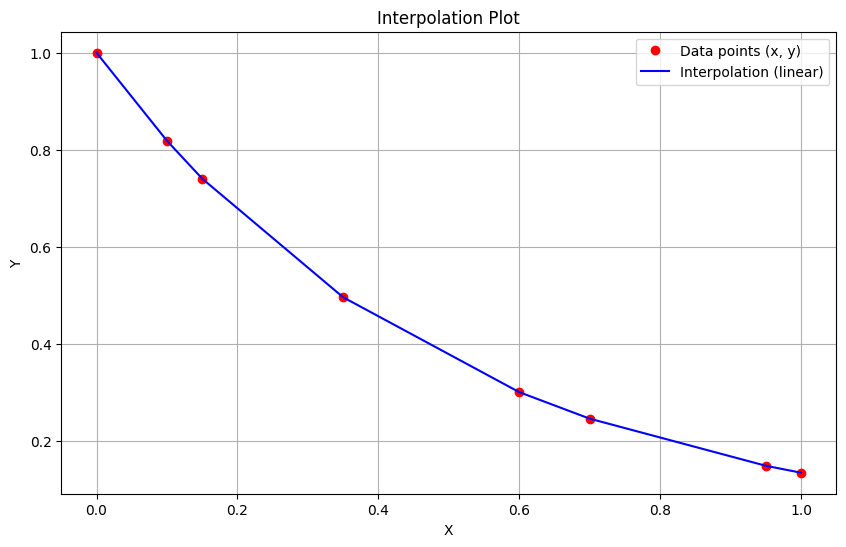

In [9]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "linear")

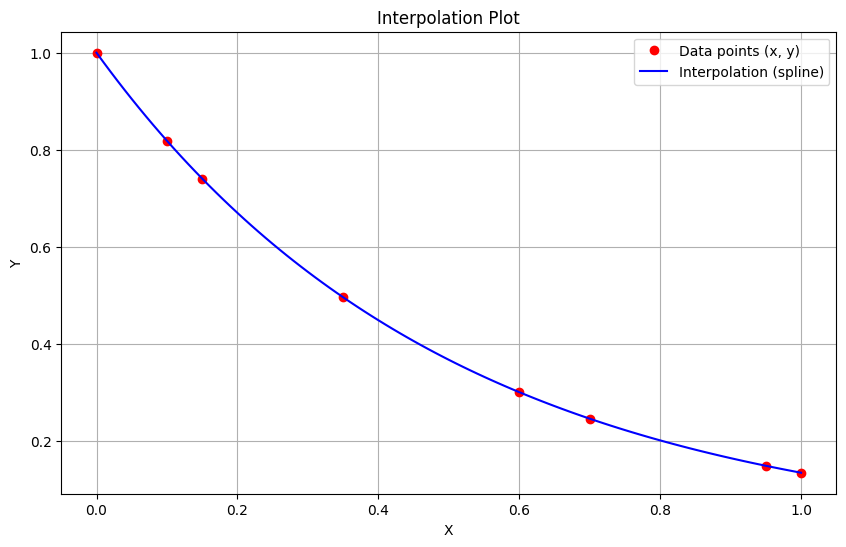

In [11]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), "spline")

8. Write a function my_D_cubic_spline(x, y, X, D), where the output Y is the cubic spline in-
terpolation at X taken from the data points contained in x and y. Instead of the standard pinned 
endpoint conditions (i.e., $S''_1(x_1) = 0$ and $S''_{n−1}(x_n) = 0$), use the endpoint conditions $S'_1(x_1) = D$ 
and $S'_{n−1}(x_n) = D$ (i.e., the slopes of the interpolating polynomials at the endpoints are D).

In [12]:
from scipy.interpolate import CubicSpline

def my_D_cubic_spline(x, y, X, D):
    f = CubicSpline(x, y, bc_type=((1, D), (1, D)))  
    return f(X)

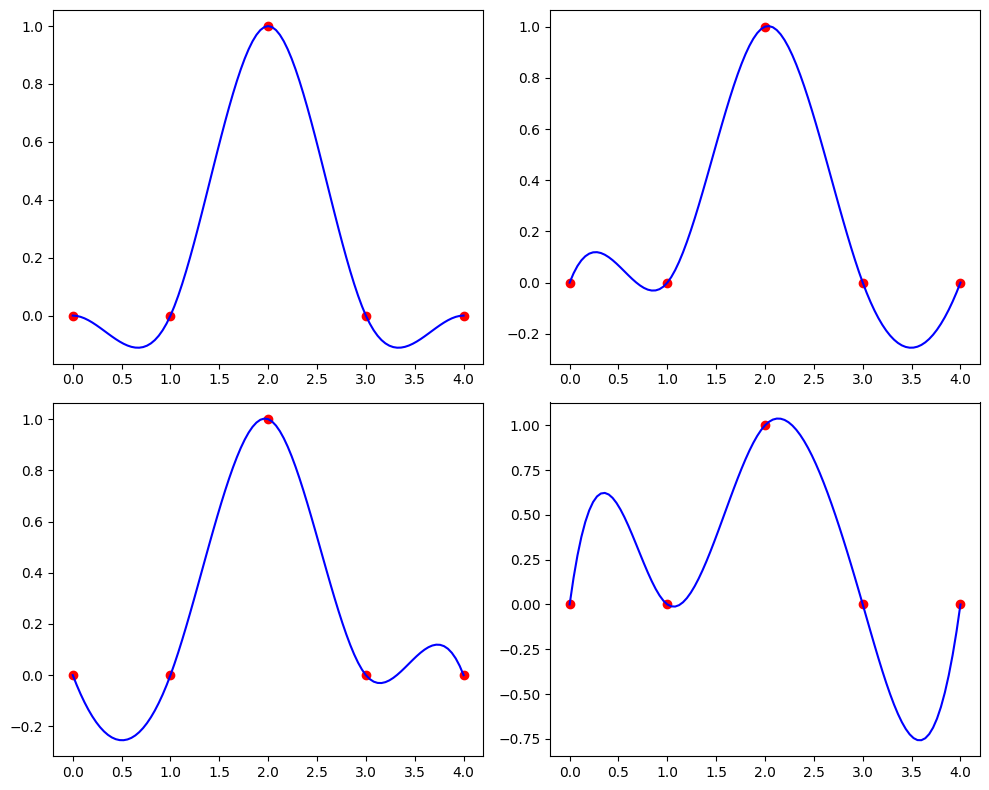

In [13]:
x = [0, 1, 2, 3, 4] 
y = [0, 0, 1, 0, 0] 
X = np.linspace(0, 4, 101)

# Solution: Y = 0.54017857
Y = my_D_cubic_spline(x, y, 1.5, 1)

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b") 
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b") 
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b") 
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b") 
plt.tight_layout()
plt.show()